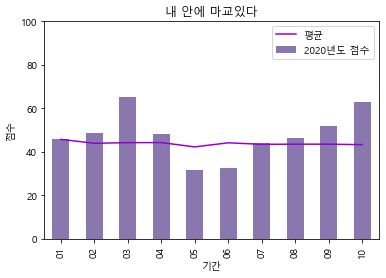

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib
import pymysql.cursors
import pandas as pd

# DB 내 작품 정보 가져오기
conn = pymysql.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    passwd='root',
    db='webnoveldb',
    charset='utf8')

curs = conn.cursor()
sql = "SELECT * FROM review where novel = 5" # idnovel 수정하여 해당 작품으로 변경
curs.execute(sql)

result = curs.fetchall()
df=pd.DataFrame(result, columns=["novel", "term", "score"])

sql = "select term, avg(score) from review where score!=0 group by term order by term"
curs.execute(sql)

result = curs.fetchall()
df2=pd.DataFrame(result, columns=["term", "score"])
df2

# 한글 출력 설정
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'
# 경고문 출력 X
warnings.filterwarnings('ignore')
flg2 = plt.figure() # 차트 플롯 생성
chart = flg2.add_subplot(1, 1, 1) # 행, 열, 위치

# data 생성
data1 = df.score.tolist()
data2 = df2.score.tolist()

# 계단형 차트
#chart.plot(data1, label='2020년도 점수', drawstyle='default', color='thistle') # 선그래프로 출력
df.score.plot.bar(label='2020년도 점수', color='#8977ad')    # bar(수직막대) - color에서 색깔 조정

# 선 스타일 차트
chart.plot(data2, drawstyle='default',label='평균', color='darkviolet') # 평균 - color에서 색깔 조정

plt.title("내 안에 마교있다") # 차트 제목 - 작품 제목 넣어주기
plt.xlabel('기간') # x축
plt.xticks(np.arange(0, 10), labels=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])

plt.ylabel('점수') # y축
plt.ylim([0, 100]) # Y축의 범위: [ymin, ymax]
#plt.axhline(y=47.71400000000001, color='purple', linewidth=1, label="전체 작품 점수 평균") # 일직선
plt.legend(loc='best') # 범례

#plt.show()
plt.savefig('result.png') # 이미지 png로 저장